In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from clyent import color
from scipy.stats import linregress
import libraries as lib

In [2]:
directory = "/Users/willemheemskerk/Downloads/20230525_h2a_poging1/0002/"
    #"../../HvA/CleanMobility - E-team/Logfiles/H2A/2023/Nogaro/20230525_h2a_poging1/0002/"
file_master = "1.csv"
file_motordriver ="5.csv"
file_FCC = "4.csv"
file_richting = "F.csv"

In [3]:
data_file_motordriver = lib.DataInladenMotorDriver(f'{directory}{file_motordriver}')
data_file_master = lib.DataInladen(f'{directory}{file_master}')
data_file_FCC = lib.DataInladenFCC(f'{directory}{file_FCC}')
data_file_richting = lib.DataInladen(f'{directory}{file_richting}')

In [4]:
data_file_motordriver["GPS longitude, in graden"] = data_file_motordriver["GPS longitude, in graden"]* -1
data_file_motordriver

,Datalogger port,"Dataloggertijd, in s",Format header (>03|04),Tijd sinds laatste herstart motordriver (s),Spanning over de motor (V),Stroom door de motor (A),Vermogen geleverd aan de motor (W),Energie geleverd aan de motor sinds reset (J),Spanning aan de ingang van motordriver (V),Stroom door de ingang van motordriver (A),...,Huidig stroom-instelpunt van cruise control,Doelsnelheid van cruise control,"Toestand cruise control2-knop (aan=1, uit=0)",Tijdstip laatste verandering cruise control2-knop,"GPS longitude, in graden","GPS latitude, in graden",GPS direction,"GPS speed, in km/h","GPS time, in seconden sinds het begin van de huidige GPS-week",Checksum
0,5,252.6246,03|04,0.0060,2.725,-0.003,-0.1,0,3.034,-0.000,...,0,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,5,252.6305,03|04,0.0118,4.996,-0.006,-0.1,0,5.562,0.008,...,0,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2,5,252.6362,03|04,0.0176,7.028,-0.008,-0.2,0,7.823,0.018,...,0,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
3,5,252.6420,03|04,0.0234,8.845,-0.010,-0.2,0,9.846,0.028,...,0,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
4,5,252.6478,03|04,0.0292,10.471,-0.010,-0.2,0,11.655,0.033,...,0,0.000,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496050,5,6919.3279,03|04,3277.5222,0.039,0.114,0.0,181490,9.762,0.111,...,2,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN
496051,5,6919.3363,03|04,3277.5308,0.039,0.122,0.0,181490,9.371,0.114,...,2,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN
496052,5,6919.3448,03|04,3277.5393,0.040,0.129,0.0,181490,8.970,0.119,...,2,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN
496053,5,6919.3533,03|04,3277.5479,0.040,0.141,0.0,181490,8.543,0.124,...,2,20.833,0,3073.986,-2.4680,4346.2451,228.6,1.5,81836.6,NaN


In [5]:

yas = 'GPS latitude, in graden'
xas = 'GPS longitude, in graden'
colorbar = 'Wielsnelheid, in km/h'
# Filtering the data so it's only the laps we want to analyze
# First filter so that the data without GPS data is removed
data_file_master = data_file_master[data_file_master[xas] != 0]
data_file_master = data_file_master[data_file_master[yas] != 0]
data_file_master = data_file_master[data_file_master[colorbar] != 0]


# Now filter out the beginning and end of the data, by removing the first and last 10% of the data
from math import ceil
filter = data_file_master.iloc[ceil(len(data_file_master)*0):ceil(len(data_file_master)*1)]
filter

KeyError: 'GPS longitude, in graden'

In [6]:
merged_df = lib.resample_and_merge(data_file_master, data_file_motordriver, freq='1s')
merged_df

,"Dataloggertijd, in s_df1",Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Richting van de snelheid,Datum,Magnetische variatie,Magnetische directie,Data in balancers,...,Doelsnelheid van cruise control,"Toestand cruise control2-knop (aan=1, uit=0)",Tijdstip laatste verandering cruise control2-knop,"GPS longitude, in graden","GPS latitude, in graden",GPS direction,"GPS speed, in km/h","GPS time, in seconden sinds het begin van de huidige GPS-week",Checksum,Format header (>03|04)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:01:11,71.31500,62428.8,4346.29270,2.53980,0.00,332.00,250523.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:12,71.92162,62429.4,4346.29270,2.53980,0.00,332.00,250523.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:13,72.91842,62430.4,4346.29284,2.53976,0.44,267.18,250523.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:14,73.91932,62431.4,4346.29370,2.53932,3.86,271.54,250523.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:15,74.92082,62432.4,4346.29398,2.53918,5.86,277.56,250523.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 02:01:24,7283.93400,82441.4,4346.30988,2.47958,1.00,202.36,250523.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 02:01:25,7284.92826,82442.4,4346.31030,2.47880,3.42,58.76,250523.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 02:01:26,7285.92840,82443.4,4346.31052,2.47870,0.88,94.12,250523.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
lat_min, lat_max = 2.4225, 2.4250
lon_min, lon_max = 0.226+4.346e3,0.237+4.346e3 
yas = 'Latitude'
xas = 'Longitude'
colorbar = 'Snelheid over de grond in km/h'
# Filtering the data so it's only the laps we want to analyze
# First filter so that the data without GPS data is removed
data_file_master = data_file_master[data_file_master[xas] != 0]
data_file_master = data_file_master[data_file_master[yas] != 0]
data_file_master = data_file_master[data_file_master[colorbar] != 0]

finish_rijen = np.array([0])


# Itereer over elke rij in de DataFrame
for i in range(len(merged_df)):
    lat = merged_df[xas].iloc[i]  # Latitude van de i-de rij
    lon = merged_df[yas].iloc[i]  # Longitude van de i-de rij

    # Controleer of het punt binnen het vierkant valt
    if lat_min <= lat <= lat_max:
        print(f"rij {i}: top")
        if lon_min <= lon <= lon_max:
            print(f"Rij {i}: The point is inside the square.")
            finish_rijen = np.append(finish_rijen, i)
print(finish_rijen)
rondetijden = np.array([])
for j in range(len(finish_rijen)-1):
    rondetijd = (filter["Dataloggertijd, in s"].iloc[finish_rijen[j+1]] 
                - filter["Dataloggertijd, in s"].iloc[finish_rijen[j]])
    rondetijden = np.append(rondetijden, rondetijd)
# print(rondetijden)            
# print(finish_rijen)
afstanden = np.array([])  # Maak een lege array voor afstanden

for i in range(len(finish_rijen)-1):
    afstand_rondje = (data_file_motordriver["Afgelegde afstand sinds laatste herstart motordriver (m)"].iloc[finish_rijen[i+1]] - data_file_motordriver["Afgelegde afstand sinds laatste herstart motordriver (m)"].iloc[finish_rijen[i]])
    afstanden = np.append(afstanden, afstand_rondje)
print(afstanden)

rij 4665: top
rij 4691: top
Rij 4691: The point is inside the square.
rij 4869: top
rij 4891: top
Rij 4891: The point is inside the square.
rij 5079: top
rij 5106: top
Rij 5106: The point is inside the square.
rij 5329: top
Rij 5329: The point is inside the square.
rij 5517: top
rij 5540: top
Rij 5540: The point is inside the square.
rij 5758: top
Rij 5758: The point is inside the square.
rij 5974: top
Rij 5974: The point is inside the square.
rij 6172: top
rij 6200: top
Rij 6200: The point is inside the square.
rij 6404: top
rij 6429: top
Rij 6429: The point is inside the square.
[   0 4691 4891 5106 5329 5540 5758 5974 6200 6429]


IndexError: single positional indexer is out-of-bounds

In [14]:

gevonden = False
finish_rijen = np.array([])

lat_min, lat_max = -2.4225, -2.4250
lon_min, lon_max = 0.226+4.346e3,0.237+4.346e3 

# Kolomnamen
yas = 'GPS latitude, in graden'
xas = 'GPS longitude, in graden'
afstand_rondje = 1588.84925219  # Afstand van een rondje in meters

# Filter rows where latitude, longitude, and the distance are non-zero
data_file_motordriver = data_file_motordriver[data_file_motordriver[xas] != 0]
data_file_motordriver = data_file_motordriver[data_file_motordriver[yas] != 0]
data_file_motordriver = data_file_motordriver[data_file_motordriver['Afgelegde afstand sinds laatste herstart motordriver (m)'] != 0]

# Itereer over elke rij in de DataFrame
for i in range(len(data_file_motordriver)):
    lat = data_file_motordriver[xas].iloc[i]  # Latitude van de i-de rij
    lon = data_file_motordriver[yas].iloc[i]  # Longitude van de i-de rij
    afstand = data_file_motordriver["Afgelegde afstand sinds laatste herstart motordriver (m)"].iloc[i]

    # Controleer of het punt binnen het vierkant valt
    if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
        if not gevonden:  # Voeg alleen toe als dit de eerste keer is dat we het punt vinden
            finish_rijen = np.append(finish_rijen, i)
            gevonden = True  # Vlag op 'gevonden' zetten
            start_afstand = afstand  # Opslaan van de startafstand bij het eerste punt

    # Controleer of de afgelegde afstand groter is dan een volledige ronde
    if gevonden and afstand >= start_afstand + (afstand_rondje * (len(finish_rijen))):
        finish_rijen = np.append(finish_rijen, i)

print(finish_rijen)
afstanden = np.array([])  # Maak een lege array voor afstanden



[]


In [47]:
rechtestuk_rijen = np.array([])

lat_min, lat_max = -2.4225, -2.4250
lon_min, lon_max = 0.226+4.346e3,0.237+4.346e3 

lat_min2, lat_max2 = -2.5478, -2.5488
lon_min2, lon_max2 = 0.001+4.34633e3,0.008+4.34633e3 

yas = 'GPS latitude, in graden'
xas = 'GPS longitude, in graden'
finish_rijen = finish_rijen.astype(int)

for i in range(len(data_file_motordriver)):
    lon= data_file_motordriver[xas].iloc[i]
    lat = data_file_motordriver[yas].iloc[i]
    if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
        rechtestuk_rijen = np.append(rechtestuk_rijen, i)
        print("ja")
    if lat_min2 <= lat <= lat_max2 and lon_min <= lon <= lon_max2:
        rechtestuk_rijen = np.append(rechtestuk_rijen, i)
        print("ja2")
        
print(rechtestuk_rijen)    

[]


In [18]:
def delta_rondje_berekenen(finish_rijen,dataset, column_naam):
    delta_per_rondje = np.array([])
    for w in range(len(finish_rijen)-1):
        delta_vermogen = (dataset[column_naam].iloc[int(finish_rijen[w+1])] - 
                          dataset[column_naam].iloc[int(finish_rijen[w])])
        delta_per_rondje = np.append(delta_per_rondje,delta_vermogen)
    return delta_per_rondje

def optellen_rondje(finish_rijen,dataset, column_naam):
    vermogen_per_rondje = np.array([])
    
    for r in range(len(finish_rijen)-1):
        start = int(finish_rijen[r])
        eind = int(finish_rijen[r+1])
        vermogen = dataset[column_naam].iloc[start:eind].sum()
        vermogen_per_rondje = np.append(vermogen_per_rondje,vermogen)
    return vermogen_per_rondje
def gemiddelde_rondje(finish_rijen,dataset, column_naam):
    gemiddelde_per_rondje = np.array([])
    
    for i in range(len(finish_rijen)-1):
        start = int(finish_rijen[i])
        eind = int(finish_rijen[i+1])
        
        gemiddelde = dataset[column_naam].iloc[start:eind].mean()
        gemiddelde_per_rondje = np.append(gemiddelde_per_rondje,gemiddelde)
    return gemiddelde_per_rondje
        

In [10]:
aangepaste_df = pd.DataFrame()  # If not already a DataFrame
#aangepaste_df['Afstanden'] = afstanden

In [163]:
gemiddelde_afstand = gemiddelde_rondje(finish_rijen,data=aangepaste_df,column_naam='Afstanden')
gemiddelde_afstand

array([1588.84925219,           nan,           nan,           nan,
                 nan,           nan,           nan])

   energie_perrondje  rondentijden
0            22351.0      204.8213
1            16604.0      209.7233
2            17906.0      227.1840
3            18055.0      214.6789
4            17198.0      219.1816
5            17557.0      214.2132
6            17468.0      225.6313
7            17217.0      231.4939
8            16746.0      220.4474


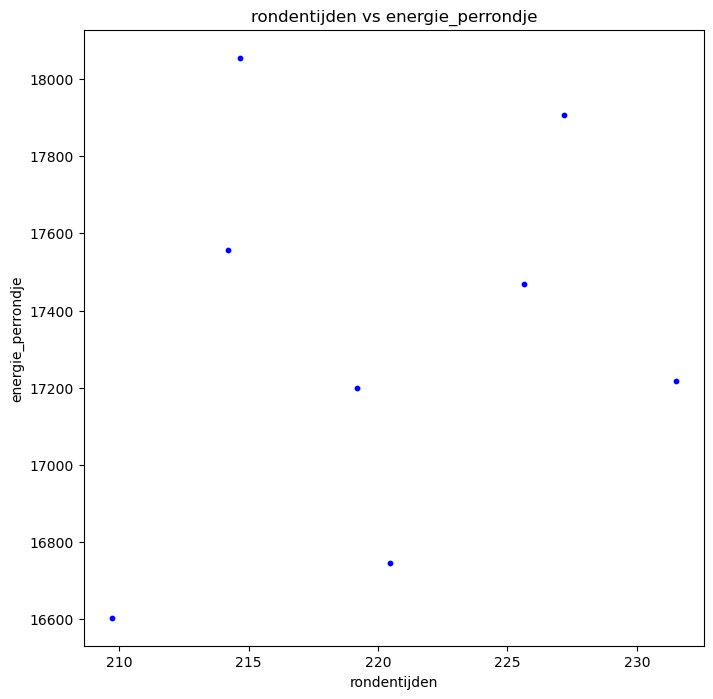

In [20]:
# Calculate the energy per lap and assign to 'energie_perrondje' column
energie_perrondje = delta_rondje_berekenen(finish_rijen, dataset = data_file_motordriver, column_naam='Energie geleverd aan de motor sinds reset (J)')
aangepaste_df["energie_perrondje"] = energie_perrondje  # Directly assign the array to the column
rondetijden = delta_rondje_berekenen(finish_rijen, dataset = data_file_motordriver, column_naam='Dataloggertijd, in s')
# Assign the lap times ('rondetijden') to the DataFrame
aangepaste_df["rondentijden"] = rondetijden  # Directly assign the array to the column

# Define the columns for the x and y axes
y_col = "energie_perrondje"
x_col = "rondentijden"

# Print or inspect the DataFrame if needed
print(aangepaste_df)

# Plot the data using your plotting function
lib.plot_data(aangepaste_df[1:], x_col, y_col)


In [76]:
delta_vermogen_per_rondje = np.array([])
vermogen_per_rondje = np.array([])
for w in range(len(finish_rijen)-1):
    delta_vermogen = (merged_df["Vermogen geleverd aan de motor (W)"].iloc[finish_rijen[w+1]] - 
                merged_df["Vermogen geleverd aan de motor (W)"].iloc[finish_rijen[w]])
    delta_vermogen_per_rondje = np.append(delta_vermogen_per_rondje,delta_vermogen)
print(delta_vermogen_per_rondje)

for r in range(len(finish_rijen)-1):
    start = finish_rijen[r]
    eind = finish_rijen[r+1]
    vermogen = merged_df["Vermogen geleverd aan de motor (W)"].iloc[start:eind].sum()
    vermogen_per_rondje = np.append(vermogen_per_rondje,vermogen)
print(vermogen_per_rondje)    

[         nan 146.20000651   5.75262783 -45.42909842  15.27151476
   2.3317139    9.4330694 ]
[  -98.56982432  9401.84355568 22895.8761813  15271.08384332
 21219.02636761 17675.99837776 22629.93194487]


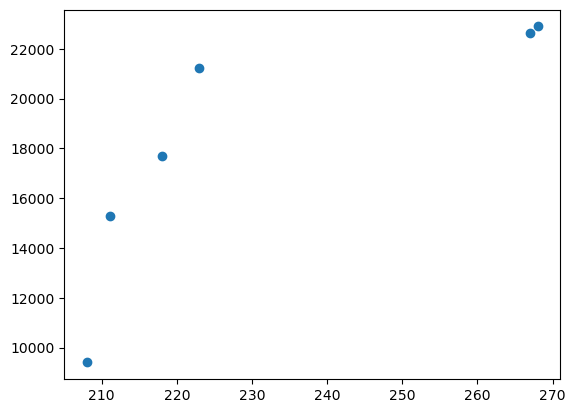

In [71]:
plt.scatter(rondetijden[1:], vermogen_per_rondje[1:])

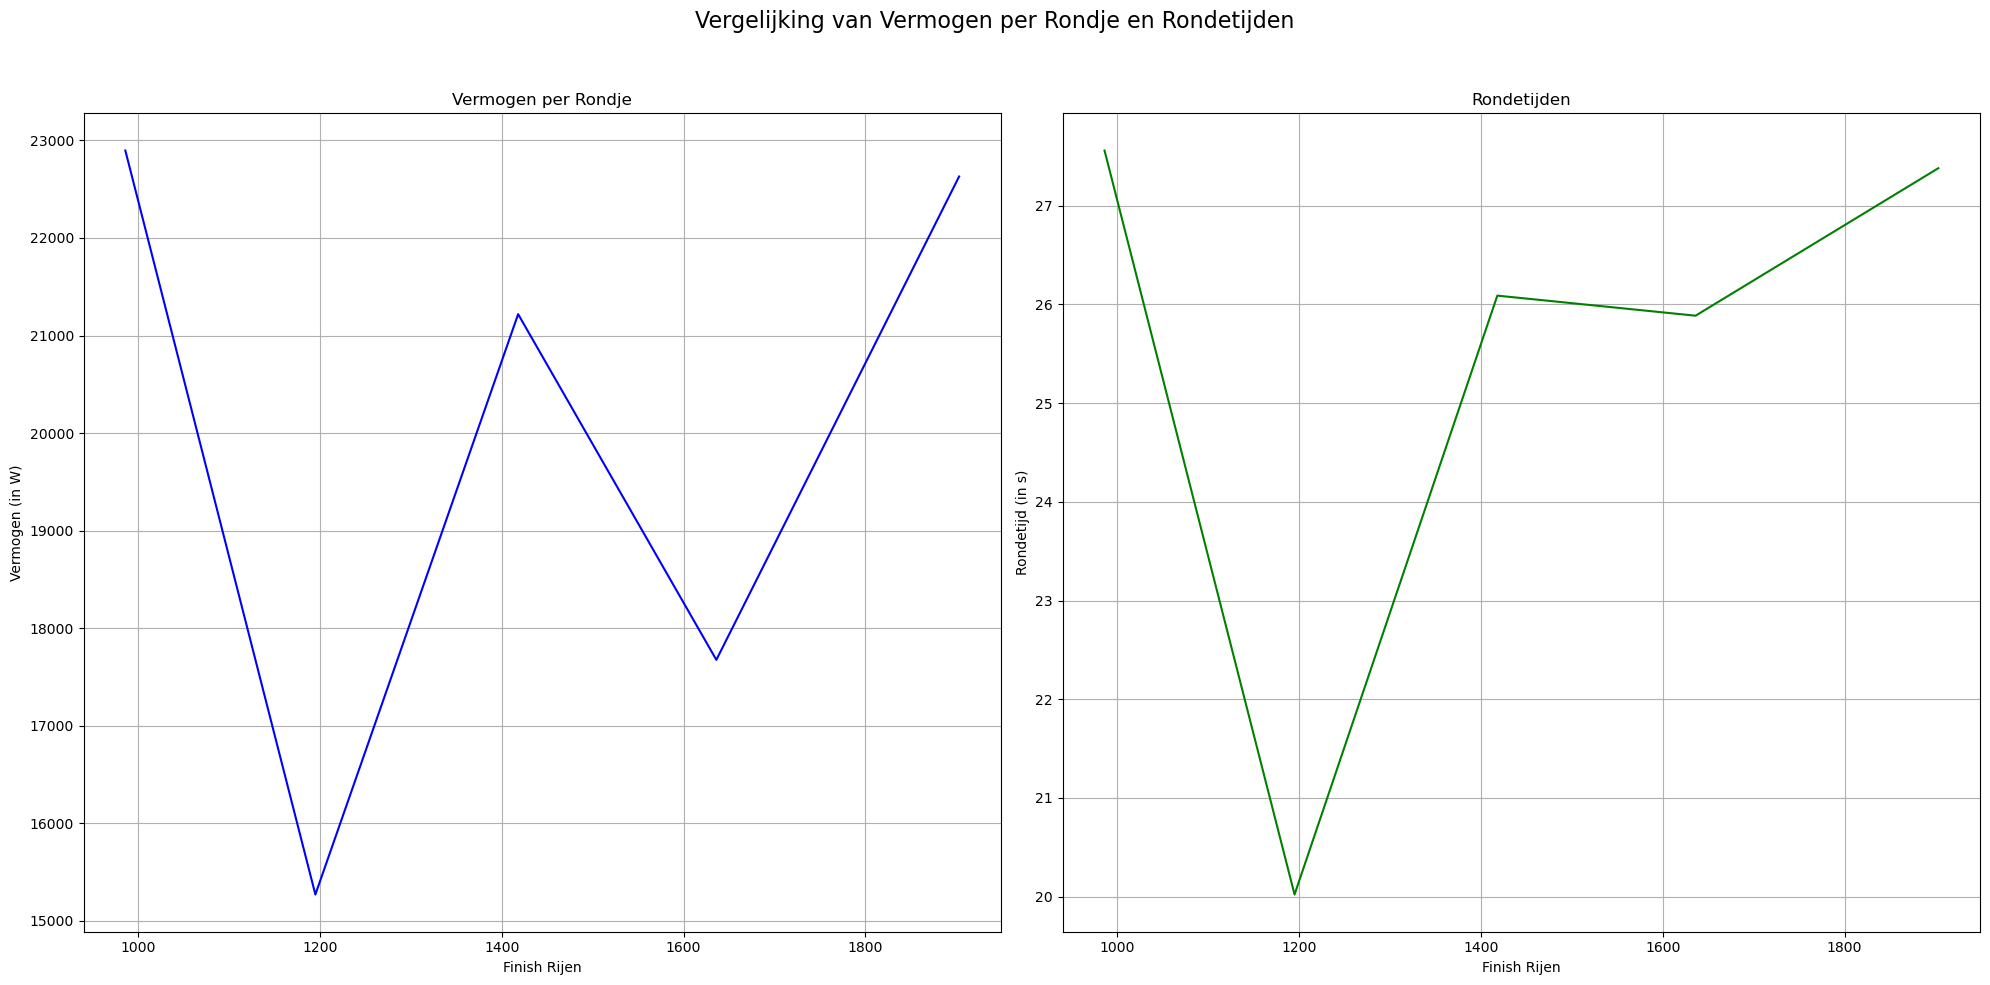

In [93]:
plt.figure(figsize=(20,10))

# First subplot: Vermogen per Rondje
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(finish_rijen[3:], vermogen_per_rondje[2:], color='blue')
plt.title('Vermogen per Rondje')  # Set the title for the first subplot
plt.xlabel('Finish Rijen')  # Set the x-axis label
plt.ylabel('Vermogen (in W)')  # Set the y-axis label
plt.grid(True)  # Add gridlines

# Second subplot: Rondetijden
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(finish_rijen[3:], gemiddelde[2:], color='green')
plt.title('Rondetijden')  # Set the title for the second subplot
plt.xlabel('Finish Rijen')  # Set the x-axis label
plt.ylabel('Rondetijd (in s)')  # Set the y-axis label
plt.grid(True)  # Add gridlines

# Show the plots
plt.suptitle('Vergelijking van Vermogen per Rondje en Rondetijden', fontsize=16)  # Add a main title for the entire figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout so it doesn't overlap
plt.show()


In [14]:
%matplotlib qt
# Assuming 'filter' is your DataFrame and 'xas', 'yas', 'colorbar' are the column names
filter = data_file_master.iloc[ceil(len(data_file_master)*0.1):ceil(len(data_file_master)*0.3)]
plt.figure(figsize=(20, 20))
plt.scatter(merged_df[xas], merged_df[yas])
plt.title('GPS data vs speed')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Adding a colorbar with a label for the speed in km/h
cbar = plt.colorbar()
cbar.set_label('Speed (km/h)')

# Coordinates for the box
lat_min, lat_max = 2.4225, 2.4250
lon_min, lon_max = 0.226+4.346e3,0.237+4.346e3 
# Plotting the box
plt.plot([lat_min, lat_max, lat_max, lat_min, lat_min],
         [lon_min, lon_min, lon_max, lon_max, lon_min],
         color='red', linestyle='--', linewidth=2)
for i in range(len(merged_df)):
    lat = merged_df[yas].iloc[i]
    lon = merged_df[xas].iloc[i]

    # Voeg de rijindex toe als tekst in de plot
    plt.text(lon, lat, str(i), fontsize=10, color='black')
plt.scatter(merged_df[xas].iloc[finish_rijen], merged_df[yas].iloc[finish_rijen], 
            color='red', label="Finish rijen", s=100, edgecolor='black')

plt.grid()
plt.show()

IndexError: positional indexers are out-of-bounds

In [11]:
%matplotlib qt
import matplotlib.pyplot as plt
from math import ceil

#data_file_motordriver = data_file_motordriver.iloc[ceil(len(data_file_motordriver)*0.3):ceil(len(data_file_motordriver)*0.5)]

yas = 'GPS latitude, in graden'
xas = 'GPS longitude, in graden'
colorbar = 'Wielsnelheid, in km/h'
data_file_motordriver = data_file_motordriver[data_file_motordriver[xas] != 0]
data_file_motordriver = data_file_motordriver[data_file_motordriver[yas] != 0]
data_file_motordriver = data_file_motordriver[data_file_motordriver[colorbar] != 0]
# Assuming 'data_file_motordriver' is your DataFrame and 'xas', 'yas' are the column names
# Filter rows from the dataset for the specific range
filter = data_file_master.iloc[ceil(len(data_file_master)*0.1):ceil(len(data_file_master)*0.3)]

# Create a figure for the scatter plot
plt.figure(figsize=(20, 20))

# Plot the data (replace merged_df with data_file_motordriver)
plt.scatter(data_file_motordriver[xas], data_file_motordriver[yas])

# Set the plot title and axis labels
plt.title('GPS data vs speed')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# Add a colorbar with a label for the speed in km/h (assuming you have speed data in 'speed' column)
cbar = plt.colorbar()
cbar.set_label('Speed (km/h)')

# Coordinates for the box (adjust these values as per your requirements)

lat_min, lat_max = -2.4225, -2.4250
lon_min, lon_max = 0.226+4.346e3,0.237+4.346e3 

# Plotting the box (red dashed lines)
plt.plot([lat_min, lat_max, lat_max, lat_min, lat_min],
         [lon_min, lon_min, lon_max, lon_max, lon_min],
         color='red', linestyle='--', linewidth=2)
lat_min2, lat_max2 = -2.5478, -2.5488
lon_min2, lon_max2 = 0.001+4.34633e3,0.008+4.34633e3 

plt.plot([lat_min2, lat_max2, lat_max2, lat_min2, lat_min2],
         [lon_min2, lon_min2, lon_max2, lon_max2, lon_min2],
         color='red', linestyle='--', linewidth=2)
# Loop through the DataFrame and annotate each point with its index
for i in range(len(data_file_motordriver)):
    lat = data_file_motordriver[yas].iloc[i]
    lon = data_file_motordriver[xas].iloc[i]

    # Add the row index as text to the plot
    plt.text(lon, lat, str(i), fontsize=10, color='black')
# finish_rijen = finish_rijen.astype(int)
# 
# # If you have specific finish rows, plot those (replace 'finish_rijen' with the actual list of rows)
# plt.scatter(data_file_motordriver[xas].iloc[finish_rijen], data_file_motordriver[yas].iloc[finish_rijen], 
#             color='red', label="Finish rijen", s=100, edgecolor='black')

# Enable grid
plt.grid()

# Show the plot
plt.show()
